Deno 🦕
Next-generation JavaScript runtime
Secure by default
Native support for TypeScript and JSX
Testing, linting, formatting, and more out of the box
High performance async I/O with Rust and Tokio
Backwards compatible with Node.js and npm
Notebook friendliness
ESM imports very friendlty
Top level async await


Deno by Example
Deno programs can either be written in JavaScript or TypeScript, or a mixture of both. All code in these examples is written in TypeScript, but all the examples also work in JavaScript.

In [1]:
console.log("Welcome to Deno!");

Welcome to Deno!


In [2]:
console.log("%c Hello Deno ", "background-color: #15803d; color: #fff");

 Hello Deno 


In [3]:
console.table([1, 2, 3]);

┌───────┬────────┐
│ (idx) │ Values │
├───────┼────────┤
│     0 │ 1      │
│     1 │ 2      │
│     2 │ 3      │
└───────┴────────┘


In [7]:
import moment from "npm:moment@2.29.4";

moment.version;
const now = moment();
console.log("Current Date and Time:", now.toString());

Current Date and Time: Sun Apr 06 2025 20:40:06 GMT+0300


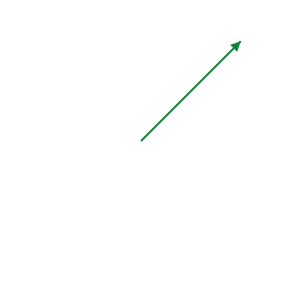

In [11]:
class Vector2D {
  x: number;
  y: number;

  constructor(x: number, y: number) {
    this.x = x;
    this.y = y;
  }

  [Symbol.for("Jupyter.display")]() {
    // Calculate viewbox size based on vector magnitude
    const magnitude = Math.sqrt(this.x ** 2 + this.y ** 2);
    const viewboxSize = Math.max(100, 2 * magnitude);
    const center = viewboxSize / 2;
      
    const color = "#15803d"

    return {
      "text/plain": `Vector2D(x: ${this.x}, y: ${this.y})`,
      "image/svg+xml": `
          <svg height="${viewboxSize}" width="${viewboxSize}" viewBox="0 0 ${viewboxSize} ${viewboxSize}">
            <defs>
              <marker id="arrowhead" markerWidth="5" markerHeight="5"
              refX="5" refY="2.5" orient="auto">
                <polygon points="0 0, 5 2.5, 0 5" fill="${color}" />
              </marker>
            </defs>

            <line x1="${center}" y1="${center}" x2="${center + this.x}" y2="${center - this.y}"
            style="stroke:${color};stroke-width:2" marker-end="url(#arrowhead)" />
          </svg>
      `
    };
  }
}

const v = new Vector2D(100, 100);
v

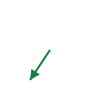

In [12]:
new Vector2D(-20, -30);

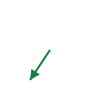

In [13]:
new Vector2D(-20, -30);

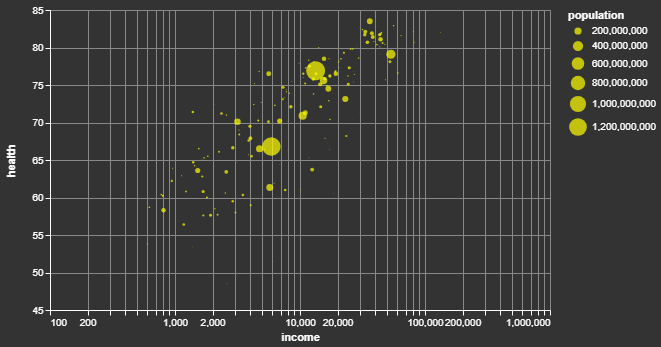

In [15]:
let spec = {
  $schema: "https://vega.github.io/schema/vega-lite/v5.json",
  description:
    "A bubble plot showing the correlation between health and income for 187 countries in the world (modified from an example in Lisa Charlotte Rost's blog post 'One Chart, Twelve Charting Libraries' --http://lisacharlotterost.github.io/2016/05/17/one-chart-code/).",
  width: 500,
  height: 300,
  data: {
    url: "https://raw.githubusercontent.com/vega/vega/main/docs/data/gapminder-health-income.csv",
  },
  params: [
    {
      name: "view",
      select: "interval",
      bind: "scales",
    },
  ],
  mark: "circle",
  encoding: {
    y: {
      field: "health",
      type: "quantitative",
      scale: { zero: false },
      axis: { minExtent: 30 },
    },
    x: {
      field: "income",
      scale: { type: "log" },
    },
    size: { field: "population", type: "quantitative" },
    color: { value: "yellow" },
  },
};

await Deno.jupyter.display(
  { "application/vnd.vegalite.v5+json": spec },
  { raw: true }
);
